#### Loading the data

In [20]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/Inc_Exp_Data.csv')

print(df.head(5))

   Monthly Household Income  Monthly Household Expense  \
0                      5000                       8000   
1                      6000                       7000   
2                     10000                       4500   
3                     10000                       2000   
4                     12500                      12000   

   Number of family members  Monthly EMI or Rent Amount  \
0                         3                        2000   
1                         2                        3000   
2                         2                           0   
3                         1                           0   
4                         2                        3000   

   Annual Household Income Highest Education Level  Number of Earning Members  
0                    64200          Under-Graduate                          1  
1                    79920              Illiterate                          1  
2                   112800          Under-Graduate      

#### Main features of the data

In [21]:
print(df.mean(numeric_only=True))

Monthly Household Income       41558.00
Monthly Household Expense      18818.00
Number of family members           4.06
Monthly EMI or Rent Amount      3060.00
Annual Household Income       490019.04
Number of Earning Members          1.46
dtype: float64


In [22]:
print(df.median(numeric_only=True))

Monthly Household Income       35000.0
Monthly Household Expense      15500.0
Number of family members           4.0
Monthly EMI or Rent Amount         0.0
Annual Household Income       447420.0
Number of Earning Members          1.0
dtype: float64


In [23]:
print(df.mode())

   Monthly Household Income  Monthly Household Expense  \
0                     45000                      25000   

   Number of family members  Monthly EMI or Rent Amount  \
0                         4                           0   

   Annual Household Income Highest Education Level  Number of Earning Members  
0                   590400                Graduate                          1  


In [24]:
print(df.std(numeric_only=True))

Monthly Household Income       26097.908979
Monthly Household Expense      12090.216824
Number of family members           1.517382
Monthly EMI or Rent Amount      6241.434948
Annual Household Income       320135.792123
Number of Earning Members          0.734291
dtype: float64


In [25]:
print(df.var(numeric_only=True))

Monthly Household Income      6.811009e+08
Monthly Household Expense     1.461733e+08
Number of family members      2.302449e+00
Monthly EMI or Rent Amount    3.895551e+07
Annual Household Income       1.024869e+11
Number of Earning Members     5.391837e-01
dtype: float64


In [26]:
print(df.kurt(numeric_only=True))

Monthly Household Income       0.115550
Monthly Household Expense      0.942490
Number of family members      -0.851445
Monthly EMI or Rent Amount    14.202523
Annual Household Income        1.101291
Number of Earning Members      2.093212
dtype: float64


In [27]:
print(df.skew(numeric_only=True))

Monthly Household Income      0.924615
Monthly Household Expense     1.199461
Number of family members      0.113674
Monthly EMI or Rent Amount    3.403680
Annual Household Income       1.192949
Number of Earning Members     1.593301
dtype: float64


In [28]:
for column in df:
    if df[column].dtype!=int:
        continue
    print(column, " min: ", df[column].min())
    print(column, " max: ", df[column].max())

Monthly Household Income  min:  5000
Monthly Household Income  max:  100000
Monthly Household Expense  min:  2000
Monthly Household Expense  max:  50000
Number of family members  min:  1
Number of family members  max:  7
Monthly EMI or Rent Amount  min:  0
Monthly EMI or Rent Amount  max:  35000
Annual Household Income  min:  64200
Annual Household Income  max:  1404000
Number of Earning Members  min:  1
Number of Earning Members  max:  4


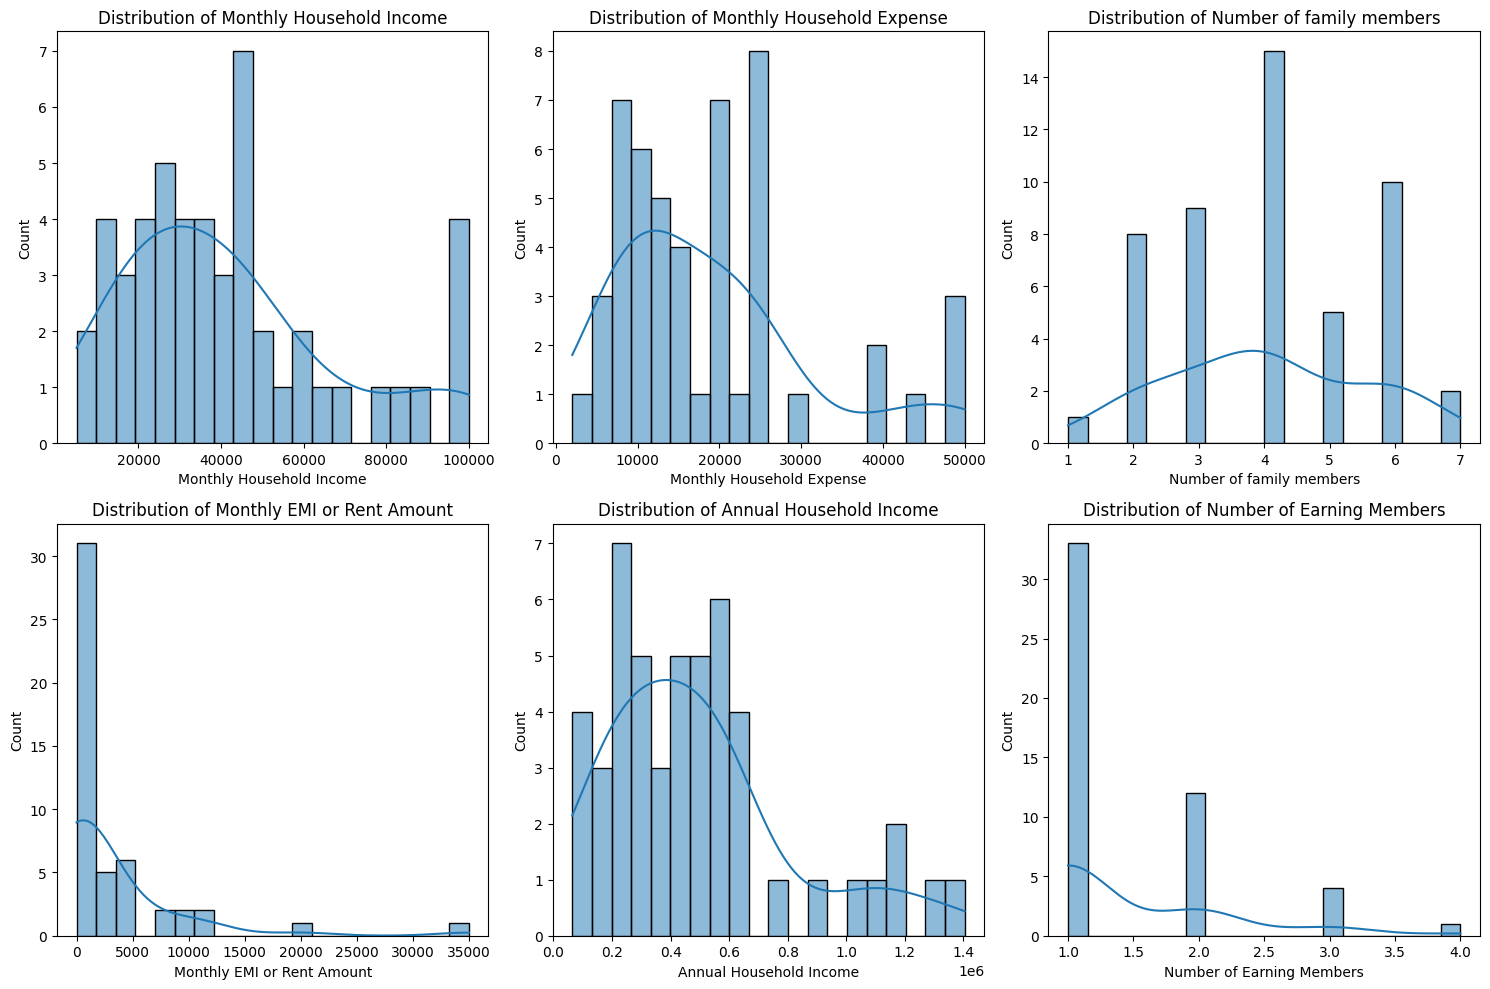

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for numeric columns
numeric_columns = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()


/tmp/ipykernel_776/909528625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Highest Education Level', palette='Set2')


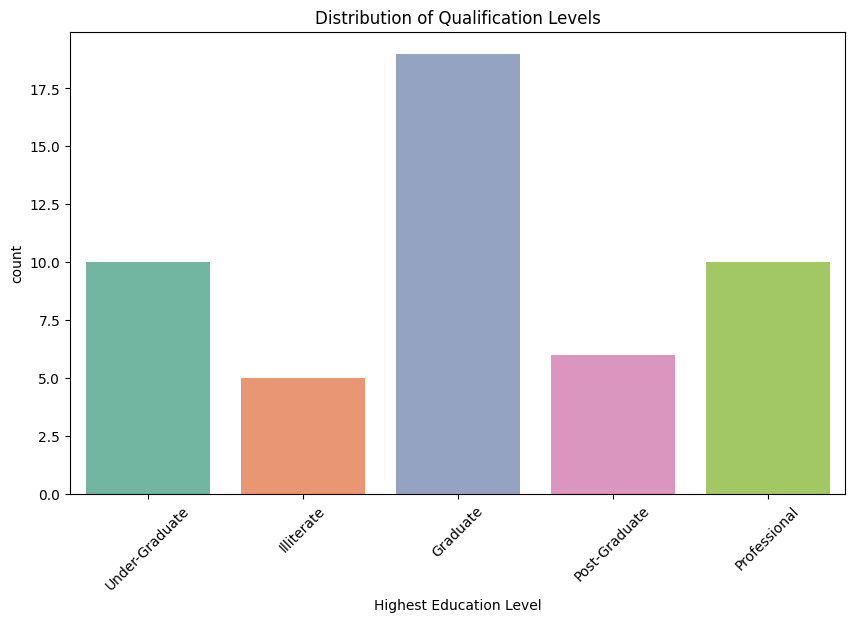

In [30]:
# Countplot for the 'Highest_Qualified_Member' categorical column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Highest Education Level', palette='Set2')
plt.title('Distribution of Qualification Levels')
plt.xticks(rotation=45)
plt.show()


In [31]:

# Basic statistical summary
print("Basic Statistical Summary:")
print(df.describe())

# Correlation matrix
print("\nCorrelation Matrix:")
print(df.corr(numeric_only=True))

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Identify unique values for categorical columns
categorical_columns = df.select_dtypes(exclude='number').columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())



Basic Statistical Summary:
       Monthly Household Income  Monthly Household Expense  \
count                 50.000000                  50.000000   
mean               41558.000000               18818.000000   
std                26097.908979               12090.216824   
min                 5000.000000                2000.000000   
25%                23550.000000               10000.000000   
50%                35000.000000               15500.000000   
75%                50375.000000               25000.000000   
max               100000.000000               50000.000000   

       Number of family members  Monthly EMI or Rent Amount  \
count                 50.000000                   50.000000   
mean                   4.060000                 3060.000000   
std                    1.517382                 6241.434948   
min                    1.000000                    0.000000   
25%                    3.000000                    0.000000   
50%                    4.000000     

#### Data transformations (preprocessing)

In [32]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of qualifications if there's a hierarchy
qualifications_order = ['Illiterate', 'Under-Graduate', 'Graduate', 'Post-Graduate', 'Professional']

# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[qualifications_order])
df['Highest Education Level'] = ordinal_encoder.fit_transform(df[['Highest Education Level']])

print(df[['Highest Education Level']].head(20))



    Highest Education Level
0                       1.0
1                       0.0
2                       1.0
3                       0.0
4                       2.0
5                       2.0
6                       3.0
7                       2.0
8                       1.0
9                       1.0
10                      1.0
11                      0.0
12                      0.0
13                      2.0
14                      2.0
15                      2.0
16                      2.0
17                      1.0
18                      2.0
19                      2.0


In [33]:
# Fill missing values with median or a specific value depending on the column
df.fillna(df.median(numeric_only=True), inplace=True)

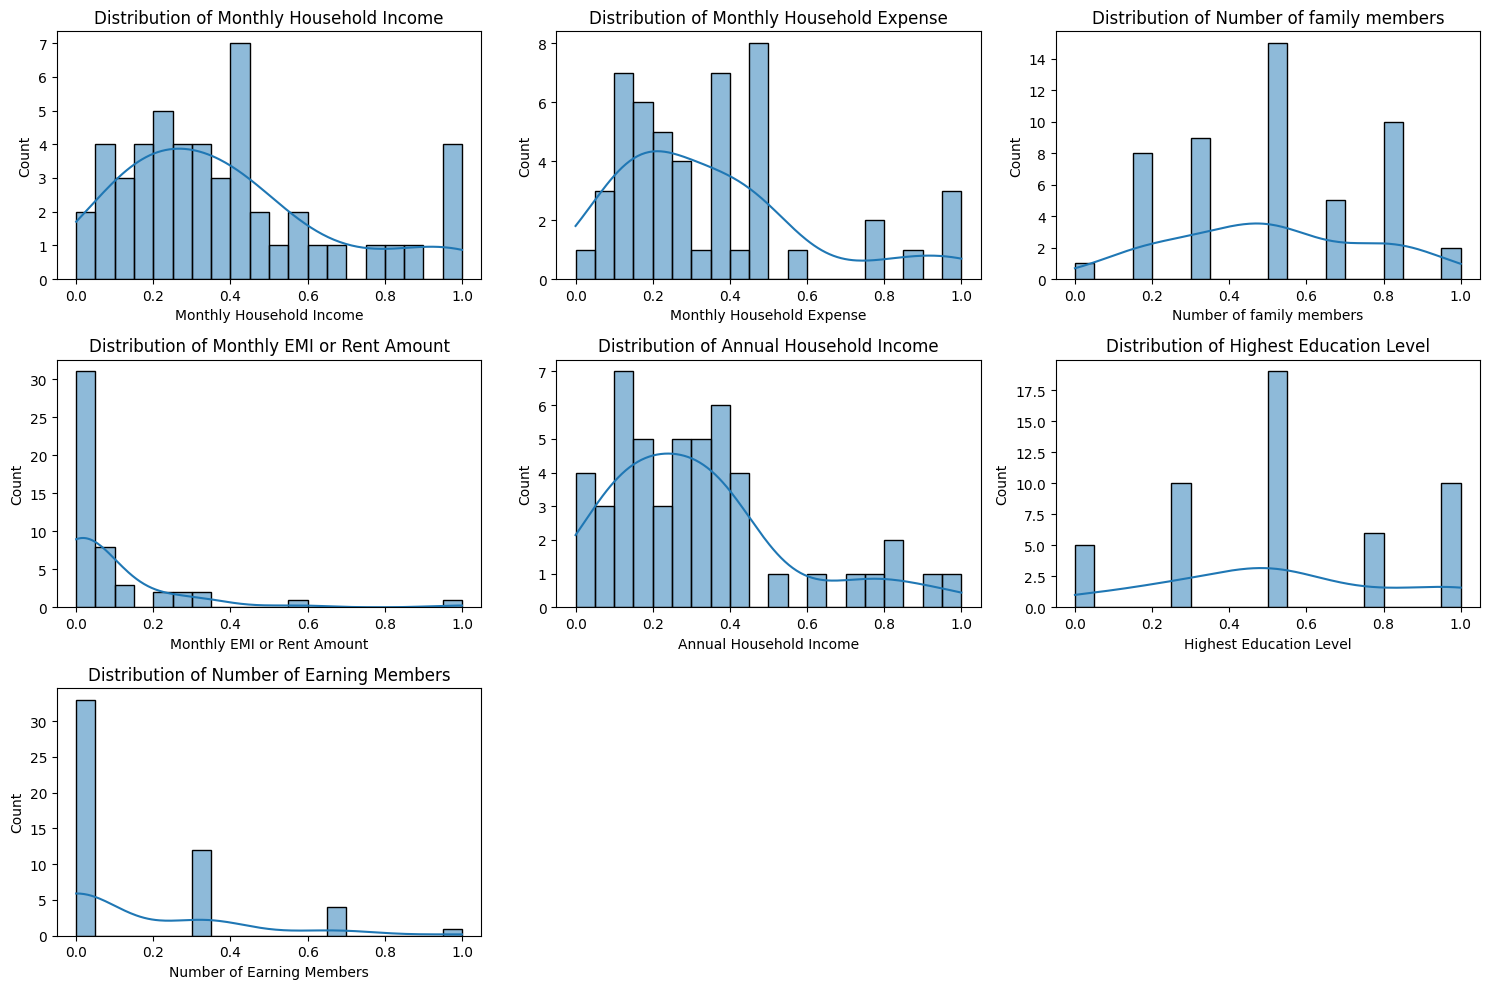

NameError: name 'correlation_matrix' is not defined

<Figure size 1500x1000 with 0 Axes>

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Min-Max scaling
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()
#print(df.describe())

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Set title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

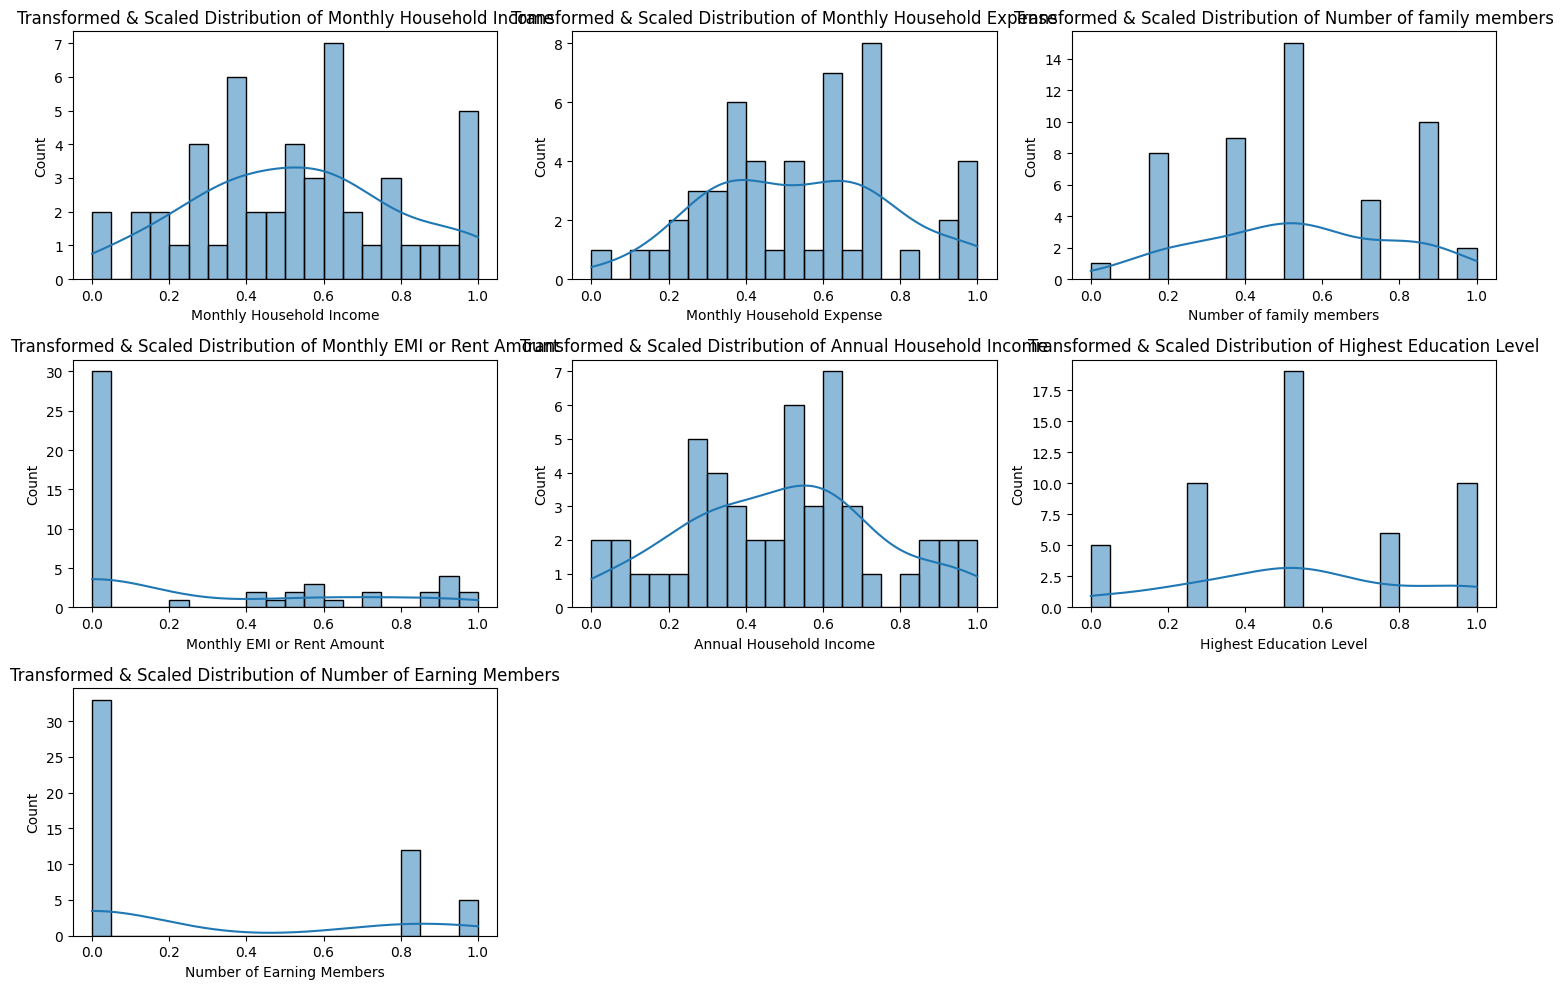

In [341]:
from sklearn.preprocessing import PowerTransformer

# Select numerical columns excluding the specified ones
numeric_columns_to_transform = [col for col in numeric_columns]

# Apply Yeo-Johnson transformation to correct skewness, excluding specific columns
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df[numeric_columns_to_transform] = pt.fit_transform(df[numeric_columns_to_transform])


# Plot the transformed and normalized data
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Transformed & Scaled Distribution of {column}')
    plt.tight_layout()
plt.show()


#### Data mining

In [342]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                            Monthly Household Income  \
Monthly Household Income                    1.000000   
Monthly Household Expense                   0.657666   
Number of family members                    0.493011   
Monthly EMI or Rent Amount                 -0.031736   
Annual Household Income                     0.980901   
Highest Education Level                     0.441543   
Number of Earning Members                   0.356547   

                            Monthly Household Expense  \
Monthly Household Income                     0.657666   
Monthly Household Expense                    1.000000   
Number of family members                     0.692753   
Monthly EMI or Rent Amount                   0.490650   
Annual Household Income                      0.648910   
Highest Education Level                      0.473234   
Number of Earning Members                    0.377058   

                            Number of family members  \
Monthly Household 

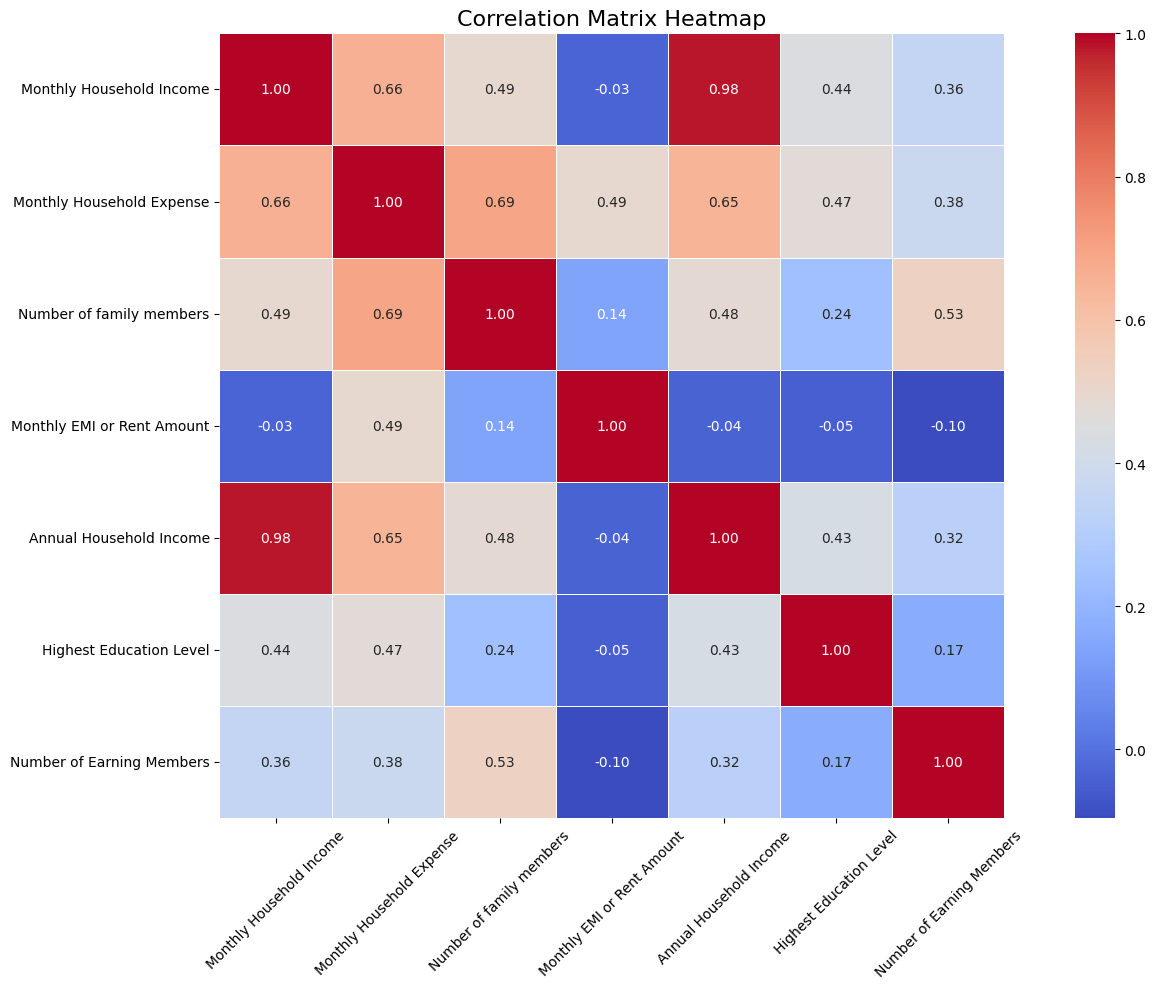

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Set title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


    Monthly Household Income  Monthly Household Expense  \
0                     5000.0                     8000.0   
1                     6000.0                     7000.0   
2                    10000.0                     4500.0   
3                    10000.0                     2000.0   
4                    12500.0                    12000.0   
5                    14000.0                     8000.0   
6                    15000.0                    16000.0   
7                    18000.0                    20000.0   
8                    19000.0                     9000.0   
9                    20000.0                     9000.0   
10                   20000.0                    18000.0   
11                   22000.0                    25000.0   
12                   23400.0                     5000.0   
13                   24000.0                    10500.0   
14                   24000.0                    10000.0   
15                   25000.0                    12300.0 

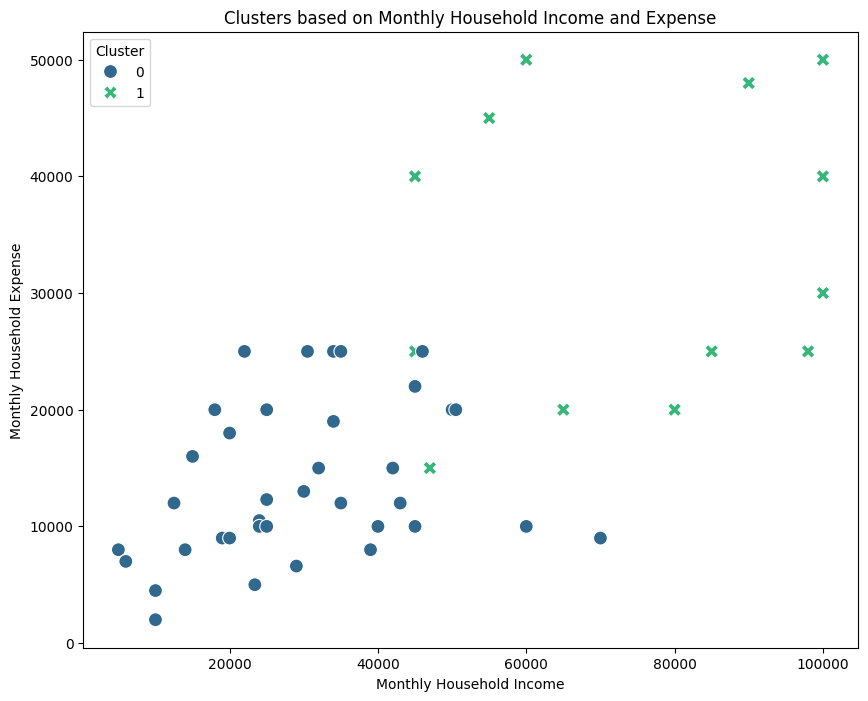

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select relevant features for clustering
features = df[['Monthly Household Income', 'Monthly Household Expense', 'Number of family members', 
               'Monthly EMI or Rent Amount', 'Annual Household Income', 
               'Number of Earning Members']]



# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features, kmeans.labels_))

# Plot the Elbow method results
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(K, inertia, 'bo-')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')

# # Plot silhouette scores
# plt.subplot(1, 2, 2)
# plt.plot(K, silhouette_scores, 'ro-')
# plt.title('Silhouette Scores')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.tight_layout()
# #plt.show()

# Choose the optimal number of clusters (for example, if 3 seems best)
optimal_k = 2

# Fit the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

df[numeric_columns] = scaler.inverse_transform(df[numeric_columns])
print(df)
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Monthly Household Income', y='Monthly Household Expense', hue='Cluster', palette='viridis', style='Cluster', s=100)
plt.title('Clusters based on Monthly Household Income and Expense')
plt.xlabel('Monthly Household Income')
plt.ylabel('Monthly Household Expense')
plt.legend(title='Cluster')
plt.show()


Mean Feature Values by Cluster:
         Monthly Household Income  Monthly Household Expense  \
Cluster                                                        
0                    29943.243243               13727.027027   
1                    74615.384615               33307.692308   

         Number of family members  Monthly EMI or Rent Amount  \
Cluster                                                         
0                        3.540541                 2500.000000   
1                        5.538462                 4653.846154   

         Annual Household Income  Highest Education Level  \
Cluster                                                     
0                  355746.810811                 1.972973   
1                  872178.461538                 2.538462   

         Number of Earning Members  
Cluster                             
0                         1.216216  
1                         2.153846  


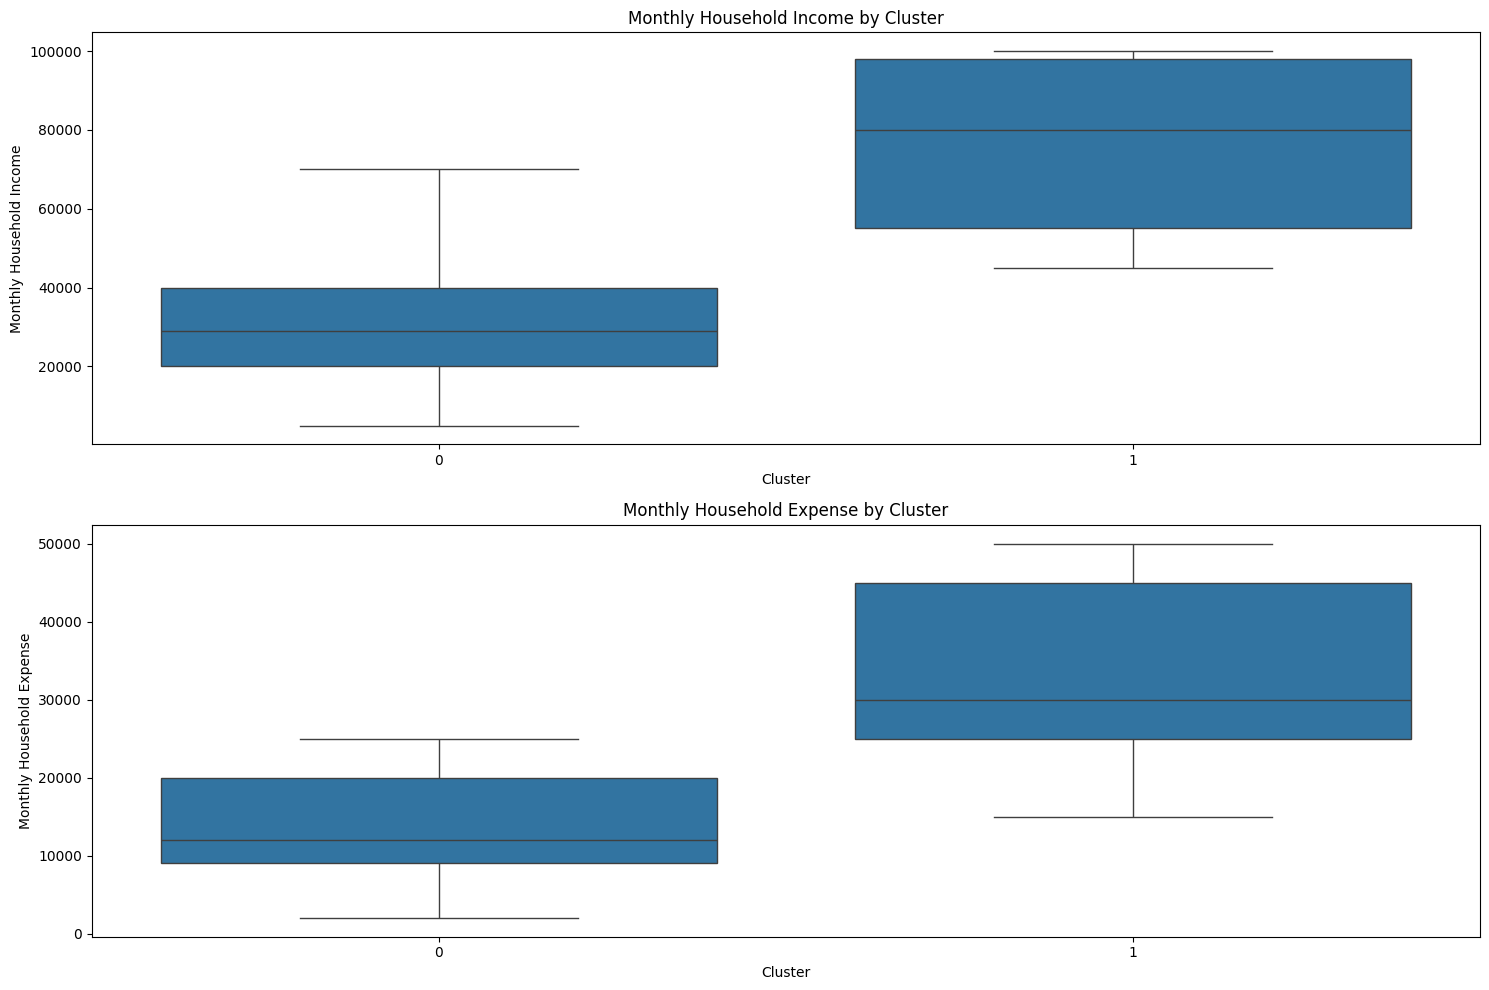

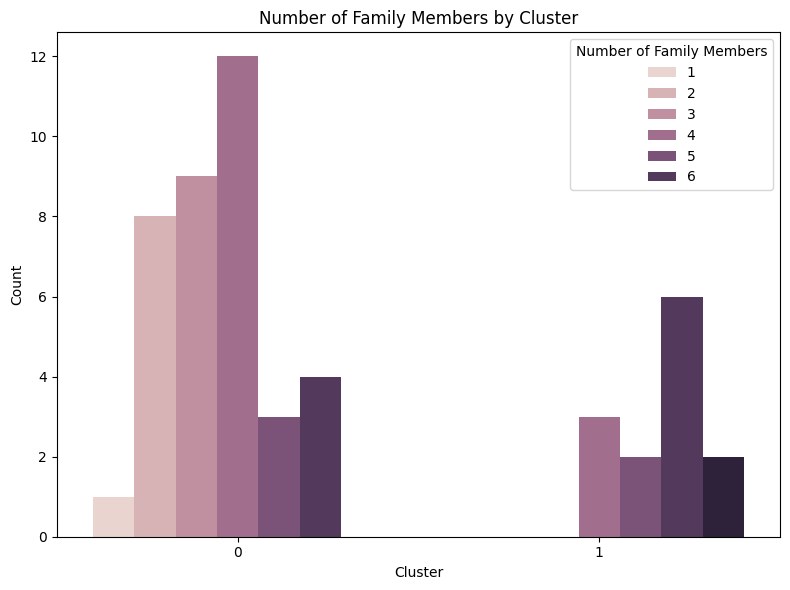

In [17]:
# Grouping by cluster and calculating mean for each feature
cluster_means = df.groupby('Cluster').mean()

# Display the mean values of each feature for each cluster
print("Mean Feature Values by Cluster:")
print(cluster_means)

# Visualizing characteristics of each cluster
plt.figure(figsize=(15, 10))

# Box plots for Monthly Household Income and Monthly Household Expense by Cluster
plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='Cluster', y='Monthly Household Income')
plt.title('Monthly Household Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monthly Household Income')

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='Cluster', y='Monthly Household Expense')
plt.title('Monthly Household Expense by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monthly Household Expense')

plt.tight_layout()
plt.show()

# Analyzing the number of family members by cluster
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cluster', hue='Number of family members')
plt.title('Number of Family Members by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Number of Family Members')
plt.tight_layout()
plt.show()
